# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Taufiq Hidayat
- **Email:** taufiqhi220@gmail.com
- **ID Dicoding:** taufiqhi220

## Menentukan Pertanyaan Bisnis

- User yang merental sepeda paling banyak pada waktu holiday, weekday, atau workingday?
- Musim apa yang paling banyak User merental sepeda?

## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

<br>

ini adalah hasil ngeload dataset day.csv

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<br>

Ini adalah hasil ngeload dataset dari hour.csv

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

Memeriksa data dari tiap kolom yang ada pada day_df. dengan menggunakan method info()

In [4]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Disini "dteday" masih bentuk objek harusnya untuk tanggal disini menggunakan tipe data datetime.
Jadi Next akan merubah tipe data "dteday" akan diubah menjadi datetime

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


untuk duplikasi data dari dataset "day.csv" dan "hour.csv" sudah nol ini berarti bisa dilanjutkan ke tahap selanjutnya

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


disini datanya sudah bagus bisa di lanjutkan untuk langkah selanjutnya yaitu cleaning data karena tadi data "dteday" itu masih object yang harusnya itu datetime

<br>

## Cleaning Data

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [9]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

disini saya sudah merubah tipedata dteday menjadi tipedata datetime64

## Exploratory Data Analysis (EDA)

### Explore ..

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [12]:
holiday_rental = day_df.groupby("holiday")["cnt"].sum()
weekday_rental = day_df.groupby("weekday")["cnt"].sum()
workingday_rental = day_df.groupby("workingday")["cnt"].sum()

print("Rental berdasarkan Holiday:\n", holiday_rental)
print("\nRental berdasarkan Weekday:\n", weekday_rental)
print("\nRental berdasarkan Workingday:\n", workingday_rental)

Rental berdasarkan Holiday:
 holiday
0    3214244
1      78435
Name: cnt, dtype: int64

Rental berdasarkan Weekday:
 weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

Rental berdasarkan Workingday:
 workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


## **Analisis Jumlah Rental Sepeda Berdasarkan Kategori**

### **User yang merental sepeda paling banyak pada waktu holiday, weekday, atau workingday?**  

#### **1. Berdasarkan Status Holiday**  
Jumlah total rental sepeda selama hari libur (`holiday = 1`) jauh lebih sedikit dibandingkan dengan hari biasa (`holiday = 0`):  
- **Hari biasa (holiday = 0)** ...... 3.214.244 rental  
- **Hari libur (holiday = 1)** ............ 78.435 rental  

Dari data ini, terlihat bahwa jumlah pengguna rental sepeda lebih tinggi pada hari-hari biasa dibandingkan hari libur.

#### **2. Berdasarkan Hari dalam Seminggu (Weekday)**  
Jumlah total rental berdasarkan hari dalam seminggu adalah sebagai berikut:  
- **Senin (0)** ............ 444.027 rental  
- **Selasa (1)** ............ 455.503 rental  
- **Rabu (2)** .............. 469.109 rental  
- **Kamis (3)** ............ 473.048 rental  
- **Jumat (4)** ............. 485.395 rental  
- **Sabtu (5)** ............ 487.790 rental  
- **Minggu (6)** .......... 477.807 rental  

Dari data ini, jumlah rental cukup merata sepanjang minggu, dengan sedikit peningkatan pada akhir pekan, terutama pada hari Sabtu dan Jumat.

#### **3. Berdasarkan Status Workingday**  
Jika dikelompokkan berdasarkan hari kerja (`workingday`), diperoleh hasil sebagai berikut:  
- **Hari kerja (workingday = 1)** ....... 2.292.410 rental  
- **Akhir pekan/hari libur (workingday = 0)** ....... 1.000.269 rental  

Dari hasil ini, terlihat bahwa pengguna lebih banyak merental sepeda pada hari kerja dibandingkan akhir pekan atau hari libur. Ini kemungkinan besar dipengaruhi oleh penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau beraktivitas.

In [13]:
season_rental = day_df.groupby("season")["cnt"].sum()
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_rental.index = season_rental.index.map(season_mapping)

print("Rental berdasarkan Musim:\n", season_rental)

Rental berdasarkan Musim:
 season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: cnt, dtype: int64


### Analisis Musim dengan Jumlah Rental Sepeda

**Pertanyaan Bisnis:**  
Musim apa yang paling banyak user merental sepeda?  

**Hasil Analisis:**  
Berdasarkan data yang dikelompokkan berdasarkan musim, jumlah rental sepeda tertinggi terjadi pada:  

- **3 - Fall** ...... 1,061,129 rental  
- **2 - Summer** ... 918,589 rental  
- **4 - Winter** .... 841,613 rental  
- **1 - Spring** .... 471,348 rental  

**Keterangan Musim:**  
1️⃣ **Spring** (Musim Semi)  
2️⃣ **Summer** (Musim Panas)  
3️⃣ **Fall** (Musim Gugur)  
4️⃣ **Winter** (Musim Dingin)  

Dari hasil ini, dapat disimpulkan bahwa musim **Fall** memiliki jumlah pengguna rental sepeda terbanyak dibandingkan musim lainnya. Kemungkinan faktor cuaca yang lebih nyaman atau kebiasaan pengguna selama musim tersebut berkontribusi terhadap tren ini.

# Visualization & Explanatory Analysis

## User yang merental sepeda paling banyak pada waktu holiday, weekday, atau workingday?

#### **1. Berdasarkan Status Holiday**  

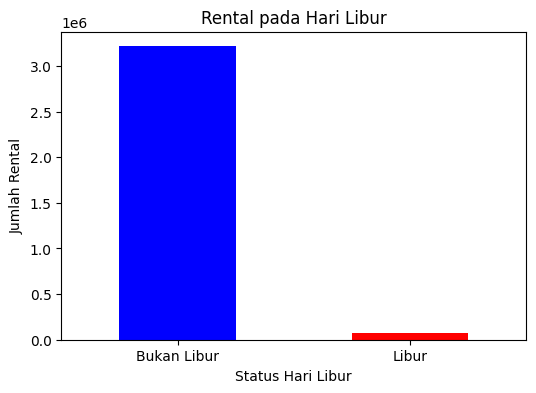

In [14]:
plt.figure(figsize=(6, 4))
holiday_rental.index = ["Bukan Libur", "Libur"]
holiday_rental.plot(kind="bar", color=["blue", "red"])
plt.title("Rental pada Hari Libur")
plt.ylabel("Jumlah Rental")
plt.xlabel("Status Hari Libur")
plt.xticks(rotation=0)
plt.show()

Dari visualisasi data ini, terlihat bahwa jumlah pengguna rental sepeda lebih tinggi pada hari-hari biasa dibandingkan hari libur.

#### **2. Plot Rental Berdasarkan Hari dalam Seminggu**  

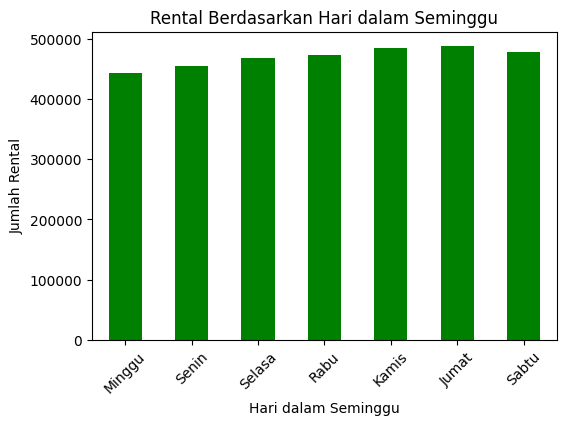

In [15]:
plt.figure(figsize=(6, 4))
weekday_labels = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
weekday_rental.index = weekday_labels
weekday_rental.plot(kind="bar", color="green")
plt.title("Rental Berdasarkan Hari dalam Seminggu")
plt.ylabel("Jumlah Rental")
plt.xlabel("Hari dalam Seminggu")
plt.xticks(rotation=45)
plt.show()

Dari Visualisasi data ini, jumlah rental cukup merata sepanjang minggu, dengan sedikit peningkatan pada akhir pekan, terutama pada hari Sabtu dan Jumat.

#### **3. Plot Rental Berdasarkan Hari Kerja** 

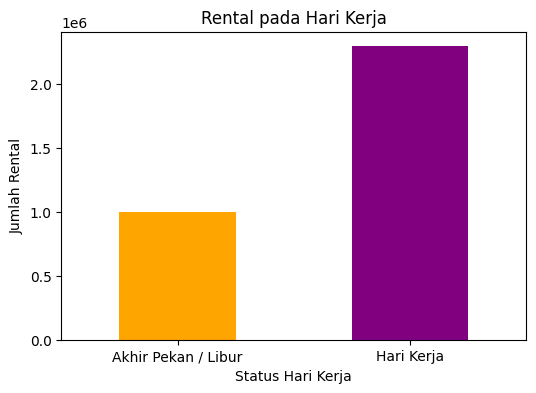

In [16]:
plt.figure(figsize=(6, 4))
workingday_rental.index = ["Akhir Pekan / Libur", "Hari Kerja"]
workingday_rental.plot(kind="bar", color=["orange", "purple"])
plt.title("Rental pada Hari Kerja")
plt.ylabel("Jumlah Rental")
plt.xlabel("Status Hari Kerja")
plt.xticks(rotation=0)
plt.show()

Dari hasil ini, terlihat bahwa pengguna lebih banyak merental sepeda pada hari kerja dibandingkan akhir pekan atau hari libur. Ini kemungkinan besar dipengaruhi oleh penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau beraktivitas harian.

## Musim apa yang paling banyak User merental sepeda?

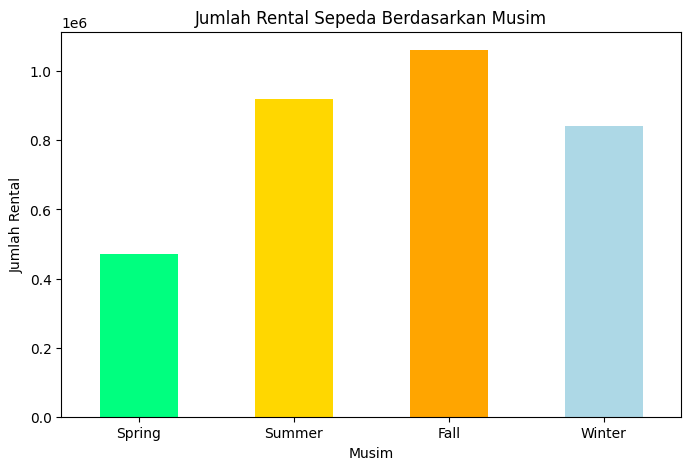

In [17]:
plt.figure(figsize=(8, 5))
season_rental.plot(kind="bar", color=["springgreen", "gold", "orange", "lightblue"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"], rotation=0)
plt.title("Jumlah Rental Sepeda Berdasarkan Musim")
plt.ylabel("Jumlah Rental")
plt.xlabel("Musim")
plt.show()

Dari Visualisasi data ini, dapat disimpulkan bahwa musim **Fall** memiliki jumlah pengguna rental sepeda terbanyak dibandingkan musim lainnya. Kemungkinan faktor cuaca yang lebih nyaman atau kebiasaan pengguna selama musim tersebut berkontribusi terhadap tren ini.

# Conclusion

### **1. User yang merental sepeda paling banyak pada waktu holiday, weekday, atau workingday?**  
Dari data yang dianalisis, jumlah rental sepeda lebih banyak terjadi pada **hari kerja (workingday = 1)** dibandingkan dengan akhir pekan atau hari libur. ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas sehari-hari seperti pergi ke kantor atau sekolah, dibandingkan dengan rekreasi atau jalan jalan saat hari libur.  

Jika dilihat berdasarkan hari dalam seminggu, jumlah rental agak merata, tetapi mengalami sedikit peningkatan pada hari Jumat dan akhir pekan. Hal ini bisa mengindikasikan bahwa pengguna lebih banyak menggunakan sepeda untuk transportasi harian selama hari kerja dan tetap menggunakannya untuk aktivitas santai di akhir pekan.  

### **2. Musim apa yang paling banyak user merental sepeda?**  
Berdasarkan jumlah total rental, musim dengan penggunaan sepeda terbanyak adalah **musim gugur (fall)**, diikuti oleh **musim panas (summer)**, **musim dingin (winter)**, dan yang paling sedikit adalah **musim semi (spring)**.  

Tingginya penggunaan sepeda di musim gugur kemungkinan disebabkan oleh cuaca yang masih cukup nyaman untuk bersepeda, sementara musim panas juga memiliki jumlah rental yang tinggi karena hari yang lebih panjang dan cuaca yang lebih mendukung. Sebaliknya, musim semi memiliki jumlah rental paling sedikit.